# Plot attenuation for different elements
This notebook lets you plot the transmission in the basic elements using neutrons and X-rays.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
data=pd.read_excel('Attenuation_coefficients_chemical_elements.xlsx',sheet_name='data')

def _transmission_plot(muN,muX,L=5,N=100, title=None, ax=None) :
    if ax is None :
        fig,ax = plt.subplots(1,figsize=(8,6))
    x=np.linspace(0,L,N)
    TN=np.exp(-muN*x)
    TX=np.exp(-muX*x)
    ax.plot(x*10,TN,label='Neutrons')
    ax.plot(x*10,TX,label='150kV X-ray')
    ax.legend()
    ax.set_xlabel('Thickness [mm]')
    ax.set_ylabel('Transmission')
    ax.grid(visible=True)
    

    if title is not None :
        ax.set_title(title)
    else :
        ax.set_title('Transmission')
        
def transmission_plot(element,L=5,N=100, ax=None) :
    dfrow=data[data['Symbol']==element]
    muN=dfrow['muN'].iloc[0]
    muX=dfrow['muX'].iloc[0]
    
    _transmission_plot(muN,muX,L,N,title='Transmission in {0}'.format(dfrow['Name'].iloc[0]), ax=ax)

In [48]:
muN=data[data['Symbol']=='Cu']['muN'].iloc[0]
print(muN)

1.0690311479494607


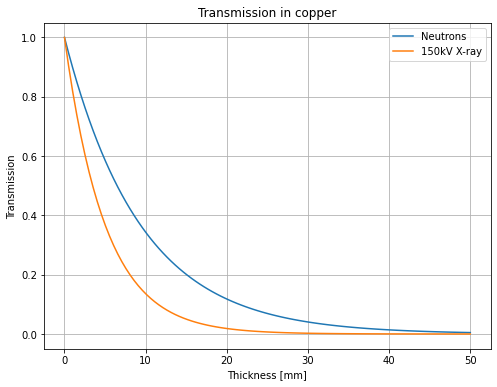

In [49]:
# Copper
muN = 1
muX = 2

transmission_plot('Cu',5,100)

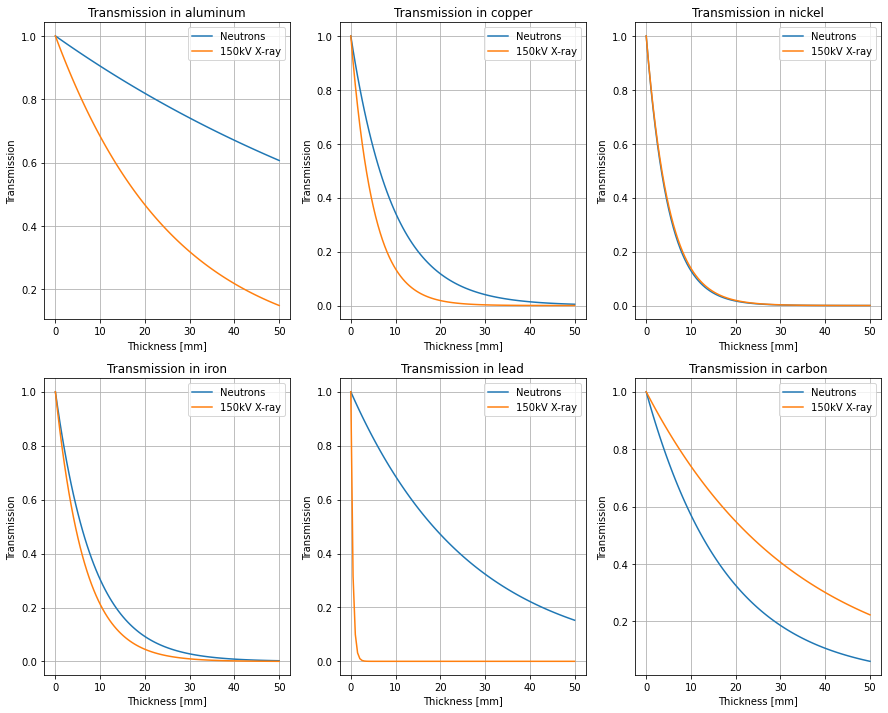

In [57]:
elements = ['Al','Cu','Ni','Fe','Pb','C']
fig,axes=plt.subplots(2,3,figsize=[15,12])
axes=axes.ravel()

for element,ax in zip(elements,axes) :
    transmission_plot(element,L=5,N=100,ax=ax)